<a href="https://colab.research.google.com/github/MeryemSulkhayeva/MeryemSulkhayeva/blob/main/SkimLit_NLP_milestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 12.15 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [2]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [3]:
import os
file_name = [data_dir + file_name for file_name in os.listdir(data_dir)]
file_name

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [4]:
os.listdir(data_dir)

['train.txt', 'test.txt', 'dev.txt']

In [5]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [6]:
train_lines = get_lines(data_dir + 'train.txt')
train_lines[:20]
# reqemler @ ile isare olunub

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [7]:
len(train_lines)

210040

In [8]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  # Loop through each line in target file
  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = "" # reset abstract string
    elif line.isspace(): # check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      # Iterate through each line in abstract and count them at the same time
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # create empty dict to store data from line
        target_text_split = abstract_line.split("\t") # split target label from text
        line_data["target"] = target_text_split[0] # get target label
        line_data["text"] = target_text_split[1].lower() # get target text and lower it
        line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
        abstract_samples.append(line_data) # add line data to abstract samples list

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [9]:
train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')
print(len(train_samples))

180040


In [10]:
import pandas as pd

train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [11]:
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [12]:
train_df['target'].value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

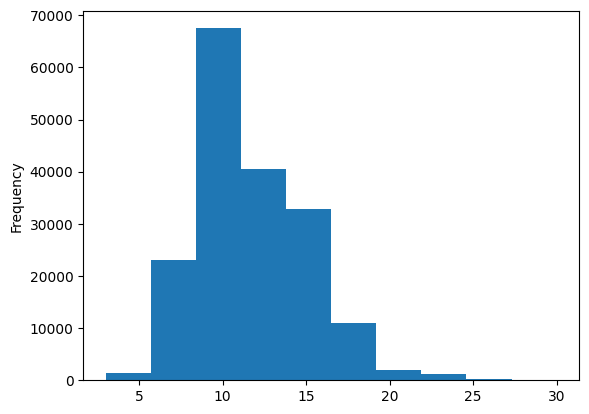

In [13]:
train_df.total_lines.plot.hist();

In [14]:
train_sentences = train_df.text.to_list()
val_sentences = val_df.text.to_list()
test_sentences = test_df.text.to_list()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [15]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [16]:
from sklearn.preprocessing import OneHotEncoder
# outputu reqeme cevir
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df.target.to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df.target.to_numpy().reshape(-1, 1))

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df.target.to_numpy())
val_labels_encoded = label_encoder.transform(val_df.target.to_numpy())
test_labels_encoded = label_encoder.transform(test_df.target.to_numpy())

In [18]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([('Tf-idf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
                    ])
model_0.fit(
    X = train_sentences,
    y = train_labels_encoded
)

Pipeline(steps=[('Tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
model_0.score(X = val_sentences, y = val_labels_encoded)

0.7218323844829869

In [21]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [22]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-06-11 09:42:38--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-11 09:42:38 (109 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [23]:
from helper_functions import calculate_results

baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [25]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.25846e+05, 4.78220e+04, 5.37600e+03, 7.86000e+02, 1.46000e+02,
        3.20000e+01, 1.90000e+01, 8.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([  1. ,  30.5,  60. ,  89.5, 119. , 148.5, 178. , 207.5, 237. ,
        266.5, 296. ]),
 <BarContainer object of 10 artists>)

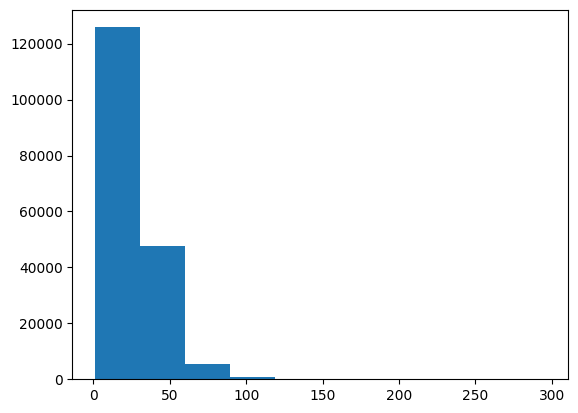

In [26]:
import matplotlib.pyplot as plt

plt.hist(sent_lens, bins = 10)

In [27]:
# ilk 95 faizde ne uzun cumle
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [28]:
max_tokens = 68000
text_vectorizer = layers.TextVectorization(max_tokens = max_tokens,
                                           output_sequence_length = 55,
                                           pad_to_max_tokens = True)
text_vectorizer

In [29]:
text_vectorizer.adapt(train_sentences)

In [30]:
import random

random_sentence = random.choice(train_sentences)
text_vectorizer([random_sentence]), random_sentence

(<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
 array([[    6,  1089,  4160,     4, 29232, 11355,     7, 27339, 32151,
         11355,     5,    12,     7,  5978,  1803,    16,  1667,   659,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0]])>,
 'to demonstrate equivalence of polyquaternium-@-preserved travoprost @ % with benzalkonium chloride-preserved travoprost @ % in patients with open-angle glaucoma or ocular hypertension .')

In [31]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
rct_20k_text_vocab[:10]

['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were']

In [32]:
token_embed = layers.Embedding(
    input_dim = len(rct_20k_text_vocab),
    output_dim = 128,
    mask_zero = True,
    name = 'token_embedding'
)

In [33]:
print(random_sentence)
print(text_vectorizer([random_sentence]))
print(token_embed(text_vectorizer([random_sentence])).shape)
print(token_embed(text_vectorizer([random_sentence])).shape)

to demonstrate equivalence of polyquaternium-@-preserved travoprost @ % with benzalkonium chloride-preserved travoprost @ % in patients with open-angle glaucoma or ocular hypertension .
tf.Tensor(
[[    6  1089  4160     4 29232 11355     7 27339 32151 11355     5    12
      7  5978  1803    16  1667   659     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
(1, 55, 128)
(1, 55, 128)


In [34]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
# tf.data.Dataset.from_tensor_slices - tensorflowa cevirir

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [35]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# her batch da 32 data var
# cpu da 1ci prefer train olub, gpu da run edir, eyni zamanda 2ci prefer train olur
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [36]:
len(train_dataset)

5627

In [37]:
inputs = layers.Input(shape = (1,), dtype = tf.string)                #(1,) -> vector seklinde
x = text_vectorizer(inputs)
x = token_embed(x)
x = tf.keras.layers.Conv1D(64, 5, padding = 'same', activation = 'relu')(x)     #padding - sag terefi 0 larla doldurur
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [38]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [39]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [40]:
len(train_dataset)

5627

In [41]:
history_model_1 = model_1.fit(
    train_dataset,
    steps_per_epoch = int(0.1 * len(train_dataset)),
    epochs = 3,
    validation_data = val_dataset,
    validation_steps = int(0.1 * len(val_dataset))
)

Epoch 1/3
562/562 [==============================] - 20s 30ms/step - loss: 0.9227 - accuracy: 0.6306 - val_loss: 0.6936 - val_accuracy: 0.7354
Epoch 2/3
562/562 [==============================] - 6s 10ms/step - loss: 0.6634 - accuracy: 0.7515 - val_loss: 0.6367 - val_accuracy: 0.7680
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.6202 - accuracy: 0.7731 - val_loss: 0.5981 - val_accuracy: 0.7872


In [42]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.6000 - accuracy: 0.7867


[0.6000207662582397, 0.7867072820663452]

In [43]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[4.31225508e-01, 1.87062785e-01, 6.92072883e-02, 2.79226243e-01,
        3.32781561e-02],
       [4.47043389e-01, 2.69080490e-01, 1.17103085e-02, 2.64707625e-01,
        7.45828310e-03],
       [1.62685946e-01, 1.04415035e-02, 1.65756105e-03, 8.25152755e-01,
        6.21778963e-05],
       ...,
       [4.03855802e-06, 5.52196521e-04, 5.12048544e-04, 1.68735971e-06,
        9.98930037e-01],
       [7.32930154e-02, 5.08224547e-01, 9.08041224e-02, 8.09717551e-02,
        2.46706620e-01],
       [1.70906827e-01, 6.28129661e-01, 5.84758855e-02, 6.22090399e-02,
        8.02785754e-02]], dtype=float32)

In [44]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [45]:
model_1_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_1_preds)

model_1_results

{'accuracy': 78.67072686349795,
 'precision': 0.7839028215896419,
 'recall': 0.7867072686349795,
 'f1': 0.7843937962159846}

In [46]:
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    trainable=False, name='Use'
)

In [47]:
inputs = tf.keras.layers.Input(shape = [], dtype = tf.string)

use = sentence_encoder_layer(inputs)
x = layers.Dense(128, activation = 'relu')(use)
outputs = layers.Dense(5, activation = 'softmax')(x)

model_2 = tf.keras.models.Model(inputs, outputs)

In [48]:
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_2_history = model_2.fit(
    train_dataset,
    steps_per_epoch = int(0.1 * len(train_dataset)),
    validation_data = val_dataset,
    validation_steps = int(0.1 * len(val_dataset)),
    epochs = 3
)

Epoch 1/3
562/562 [==============================] - 17s 20ms/step - loss: 0.9157 - accuracy: 0.6482 - val_loss: 0.7977 - val_accuracy: 0.6912
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7715 - accuracy: 0.7001 - val_loss: 0.7586 - val_accuracy: 0.6991
Epoch 3/3
562/562 [==============================] - 7s 13ms/step - loss: 0.7573 - accuracy: 0.7086 - val_loss: 0.7441 - val_accuracy: 0.7121


In [49]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 Use (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [50]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras.models import Sequential

# # Create a Sequential model and add the KerasLayer
# model = Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, name='USE'),
#     # Add other layers as needed
# ])

# # Set the specific layer to be trainable
# model.get_layer(name='USE').trainable = True

In [51]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.7455 - accuracy: 0.7122


[0.7454615831375122, 0.7122335433959961]

In [52]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_pred_probs


945/945 [==============================] - 10s 10ms/step


array([[0.4268402 , 0.37396082, 0.00219896, 0.18958496, 0.00741509],
       [0.36113876, 0.48193112, 0.00331225, 0.15093644, 0.00268149],
       [0.20653681, 0.14898568, 0.01760029, 0.58863324, 0.0382439 ],
       ...,
       [0.00241253, 0.00533424, 0.04666648, 0.00099174, 0.944595  ],
       [0.00427119, 0.04483232, 0.20709802, 0.00148524, 0.74231315],
       [0.18345644, 0.24797794, 0.47500014, 0.00693705, 0.08662836]],
      dtype=float32)

In [53]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [54]:
model_2_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_2_preds)
model_2_results


{'accuracy': 71.22335495829472,
 'precision': 0.7126402875927556,
 'recall': 0.7122335495829472,
 'f1': 0.7091655533696846}

In [55]:
def split_chars(text):
  return ' '.join(list(text))

split_chars(random_sentence)

't o   d e m o n s t r a t e   e q u i v a l e n c e   o f   p o l y q u a t e r n i u m - @ - p r e s e r v e d   t r a v o p r o s t   @   %   w i t h   b e n z a l k o n i u m   c h l o r i d e - p r e s e r v e d   t r a v o p r o s t   @   %   i n   p a t i e n t s   w i t h   o p e n - a n g l e   g l a u c o m a   o r   o c u l a r   h y p e r t e n s i o n   .'

In [56]:
' '.join(random_sentence)

't o   d e m o n s t r a t e   e q u i v a l e n c e   o f   p o l y q u a t e r n i u m - @ - p r e s e r v e d   t r a v o p r o s t   @   %   w i t h   b e n z a l k o n i u m   c h l o r i d e - p r e s e r v e d   t r a v o p r o s t   @   %   i n   p a t i e n t s   w i t h   o p e n - a n g l e   g l a u c o m a   o r   o c u l a r   h y p e r t e n s i o n   .'

In [57]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [58]:
train_sentences[1]

'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .'

In [59]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

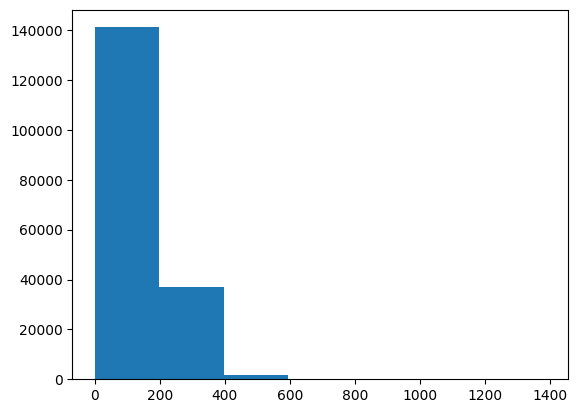

In [60]:
import matplotlib.pyplot as plt

plt.hist(char_lens, bins = 7);

In [61]:
# persentile
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len
# 290 herf datanin 95%ni ehate edir

290

In [62]:
import string

alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

# ascii_lowercase -> butun balaca herfler
# string.digits -> reqemler
# string.punctuation -> simvol

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
from keras.layers import TextVectorization
NUM_CHAR_TOKENS = len(alphabet) + 2                # +1 bosluqlari da say, +1 None qiymetler ucun
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    standardize='lower_and_strip_punctuation',
                                    output_sequence_length = output_seq_char_len,
                                    name = 'char_vectorizer')

In [64]:
char_vectorizer.adapt(train_chars)

In [65]:
char_vocab = char_vectorizer.get_vocabulary()
char_vocab, len(char_vocab)

(['',
  '[UNK]',
  'e',
  't',
  'i',
  'a',
  'n',
  'o',
  'r',
  's',
  'd',
  'c',
  'l',
  'h',
  'p',
  'm',
  'u',
  'f',
  'g',
  'y',
  'w',
  'v',
  'b',
  'k',
  'x',
  'z',
  'q',
  'j'],
 28)

In [66]:
random_train_chars = random.choice(train_chars)
char_vectorizer([random_train_chars])

<tf.Tensor: shape=(1, 290), dtype=int64, numpy=
array([[ 4,  6,  3, 13,  2,  9,  5,  3, 16,  8,  5,  3,  2, 10, 15,  7,
        24,  5, 10,  7,  9,  5, 18,  2, 18,  8,  7, 16, 14,  3, 13,  2,
        15,  7, 24,  4, 22, 16,  9,  3,  4,  7,  6,  3,  4, 15,  2, 20,
         5,  9, 10,  2,  3,  2,  8, 15,  4,  6,  2, 10, 22, 19,  3, 13,
         2, 10,  4,  9,  5, 14, 14,  2,  5,  8,  5,  6, 11,  2,  7, 17,
         3, 13,  2,  8, 15,  7,  9,  2,  6,  9,  4,  3,  4, 25,  5,  3,
         4,  7,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [67]:
char_embed = layers.Embedding(
    input_dim = len(char_vocab),
    output_dim = 25,
    mask_zero = False,
    name = 'char_embed'
)

In [68]:
inputs = layers.Input(shape = (1,), dtype = tf.string)

x = char_vectorizer(inputs)
x = char_embed(x)

x = layers.Conv1D(64, kernel_size = 10, padding = 'same', activation = 'relu')(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences = True))(x)      #return_sequences > her soze gore texmin
x = layers.Bidirectional(layers.LSTM(32, return_sequences = True))(x)
x = layers.Conv1D(16, kernel_size = 10, padding = 'same', activation = 'relu')(x)
x = layers.GlobalMaxPooling1D()(x)

outputs = layers.Dense(num_classes, activation = 'softmax')(x)

model_3 = tf.keras.models.Model(inputs, outputs, name = 'model_3_conv1d_char_embedding')

model_3.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [69]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           16064     
                                                                 
 bidirectional (Bidirection  (None, 290, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 2

In [70]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot))
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot))

# test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
# birlikde yazanda her defe run edende batchlere bolunmur tezden

train_char_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [71]:
train_char_dataset = train_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = val_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = test_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [72]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data = val_char_dataset,
                              validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 35s 47ms/step - loss: 1.3403 - accuracy: 0.4046 - val_loss: 1.2067 - val_accuracy: 0.4960
Epoch 2/3
562/562 [==============================] - 30s 53ms/step - loss: 1.0726 - accuracy: 0.5709 - val_loss: 0.9045 - val_accuracy: 0.6506
Epoch 3/3
562/562 [==============================] - 24s 43ms/step - loss: 0.9234 - accuracy: 0.6349 - val_loss: 0.8552 - val_accuracy: 0.6576


In [73]:
model_3.summary()

Model: "model_3_conv1d_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           16064     
                                                                 
 bidirectional (Bidirection  (None, 290, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 2

In [74]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 25s 24ms/step


array([[3.9103478e-01, 2.8052256e-01, 3.4732152e-02, 2.6807553e-01,
        2.5634995e-02],
       [3.0445158e-01, 1.2776425e-01, 1.0667155e-02, 5.5150121e-01,
        5.6157946e-03],
       [1.5541060e-01, 7.9964958e-03, 3.4059081e-03, 8.3302796e-01,
        1.5898683e-04],
       ...,
       [1.2491102e-02, 5.9537396e-02, 1.3731654e-01, 1.1464934e-02,
        7.7918994e-01],
       [1.2554718e-02, 1.9231926e-01, 3.0552512e-02, 1.2084831e-02,
        7.5248867e-01],
       [3.5391128e-01, 3.9016628e-01, 3.5707202e-02, 1.8484892e-01,
        3.5366412e-02]], dtype=float32)

In [75]:
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 3, 3, ..., 4, 4, 1])>

In [76]:
model_3_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 66.10287303058388,
 'precision': 0.661238189946005,
 'recall': 0.6610287303058388,
 'f1': 0.6587546788524865}

In [77]:
#Token level embedding
token_inputs = layers.Input(shape = [], dtype = tf.string, name = 'token_input')
token_embedding = sentence_encoder_layer(token_inputs)      #sentence_encoder_layer -> reqemlere cevir
token_outputs = layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.models.Model(token_inputs, token_outputs)

#Character level embedding
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_input')
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(char_inputs,
                            char_bi_lstm)

#Concatenate these two outputs
token_char_concat = layers.Concatenate(name = 'token_char_hybrid')([token_model.output, char_model.output])   #2 layeri birlesdirm ucun, outputlariyla

#output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = 'relu')(combined_dropout)

final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = 'softmax')(final_dropout)

#construc model
model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                         outputs = output_layer,
                         name = 'model_4_token_and_char_embedding')

In [78]:
token_model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_4')>

In [79]:
token_model.input

<KerasTensor: shape=(None,) dtype=string (created by layer 'token_input')>

In [80]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 Use (KerasLayer)            (None, 512)                  2567978  

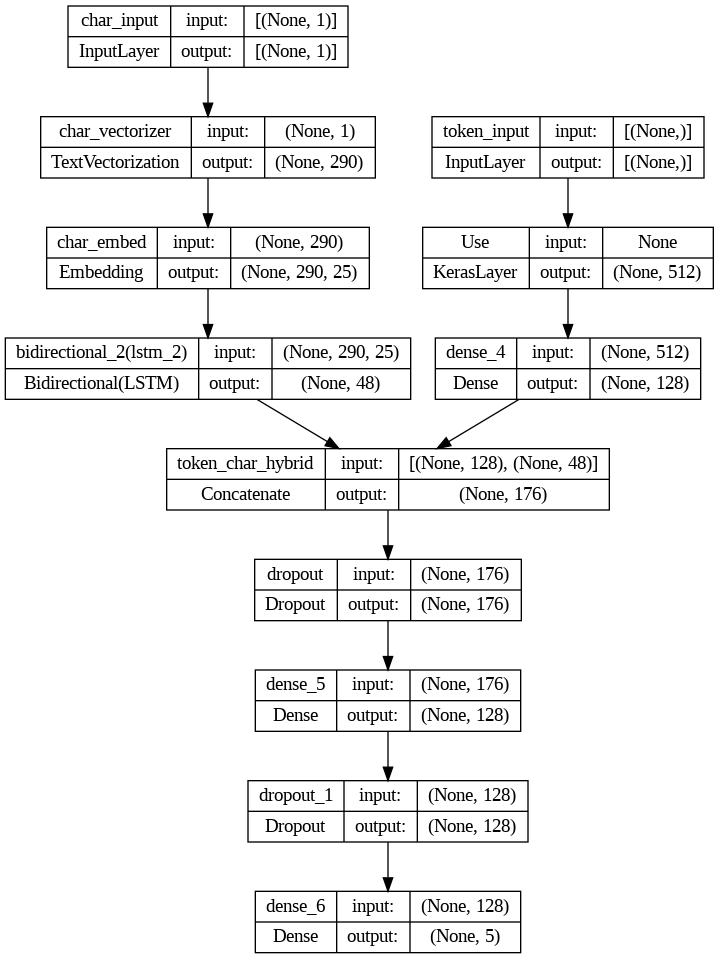

In [81]:
from keras.utils import plot_model

plot_model(model_4, show_shapes = True)
# sag sozler, sol herfleri oyredir

In [82]:
model_4.compile(
    loss = 'categorical_crossentropy',
    optimizer  =tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [83]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))                    #sozler ile textleri birlesdir
train_char_token_labels = tf.data.Dataset.from_tensor_slices((train_labels_one_hot))
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels))              #birlesdirir zip ile

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [84]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices((val_labels_one_hot))
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices((test_labels_one_hot))
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))

test_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [85]:
train_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [86]:
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_token_dataset)),
                              epochs=5,
                              validation_data = val_char_token_dataset,
                              validation_steps = int(0.1 * len(val_char_token_dataset)))

Epoch 1/5
562/562 [==============================] - 44s 66ms/step - loss: 0.9888 - accuracy: 0.6050 - val_loss: 0.7911 - val_accuracy: 0.6955
Epoch 2/5
562/562 [==============================] - 32s 57ms/step - loss: 0.8068 - accuracy: 0.6887 - val_loss: 0.7321 - val_accuracy: 0.7221
Epoch 3/5
562/562 [==============================] - 27s 48ms/step - loss: 0.7835 - accuracy: 0.7010 - val_loss: 0.6986 - val_accuracy: 0.7347
Epoch 4/5
562/562 [==============================] - 30s 53ms/step - loss: 0.7452 - accuracy: 0.7177 - val_loss: 0.6751 - val_accuracy: 0.7457
Epoch 5/5
562/562 [==============================] - 35s 62ms/step - loss: 0.7549 - accuracy: 0.7105 - val_loss: 0.6603 - val_accuracy: 0.7510


In [87]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 28s 30ms/step - loss: 0.6676 - accuracy: 0.7456


[0.6676207184791565, 0.7455646991729736]

In [88]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 Use (KerasLayer)            (None, 512)                  2567978  

In [89]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)
model_4_preds

945/945 [==============================] - 29s 29ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 0])>

In [90]:
model_4_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 74.55646762875678,
 'precision': 0.7431278088908413,
 'recall': 0.7455646762875678,
 'f1': 0.7406854351964265}

In [91]:
model_1_results

{'accuracy': 78.67072686349795,
 'precision': 0.7839028215896419,
 'recall': 0.7867072686349795,
 'f1': 0.7843937962159846}

In [92]:
model_2_results

{'accuracy': 71.22335495829472,
 'precision': 0.7126402875927556,
 'recall': 0.7122335495829472,
 'f1': 0.7091655533696846}

In [93]:
train_df['line_number'].value_counts()
# cumleleri giris, esas ve neticeye bolur

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

In [94]:
np.percentile(train_df.line_number, 95)

13.0

In [95]:
# 15den sonra onehotencoder e cevir -> hec biri bir birinden ustun oldugunu  gosterme

train_line_numbers_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 15)

train_line_numbers_one_hot

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [96]:
train_df.total_lines.value_counts()
# 1 metnde nece cumle var - coxunda 11 cumle var

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

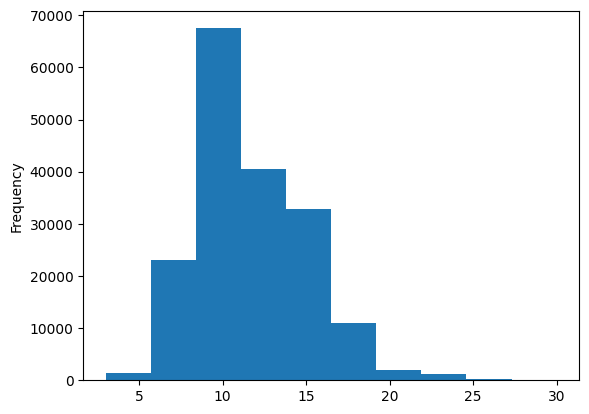

In [97]:
train_df.total_lines.plot.hist()

In [98]:
np.percentile(train_df.total_lines, 98)

20.0

In [99]:
train_total_lines_one_hot= tf.one_hot(train_df.total_lines.to_numpy(), depth = 20)
val_total_lines_one_hot= tf.one_hot(val_df.total_lines.to_numpy(), depth = 20)
test_total_lines_one_hot= tf.one_hot(test_df.total_lines.to_numpy(), depth = 20)

In [100]:
token_inputs = layers.Input(shape = [], dtype = tf.string, name = 'token_inputs')
token_embedding = sentence_encoder_layer(token_inputs)                                        #yuxaridakinda sentence yox idi, sinaq meqsediyle idi
token_outputs = layers.Dense(128, activation  ='relu')(token_embedding)

token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = layers.Input(shape = (1,), dtype = tf.string, name  ='char_inputs')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [101]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot.dtype

(TensorShape([180040, 15]), tf.float32)

In [102]:
line_number_inputs = layers.Input(shape = (15,), dtype = tf.float32, name = 'line_numbers_inputs')
line_number_outputs = layers.Dense(32, activation = 'relu')(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, line_number_outputs)
# line-setir sirasi


total_lines_inputs = layers.Input(shape = (20,), dtype = tf.float32, name = 'total_lines_inputs')
total_lines_outputs = layers.Dense(32, activation = 'relu')(total_lines_inputs)
total_lines_model = tf.keras.Model(total_lines_inputs, total_lines_outputs)
# nece setir

In [103]:
combined_embeddings = layers.Concatenate(name = 'char_token_hybrid_embedding')([token_model.output, char_model.output])
# birlesdiririk 'token ile char'
z = layers.Dense(256, activation = 'relu')(combined_embeddings)
z = layers.Dropout(0.5)(z)

In [104]:
tribrid_embeddings = layers.Concatenate(name = 'char_token_positional_embeddings')([line_number_model.output,
                                                                                    total_lines_model.output,
                                                                                    z])
# 4 layer birlesir(char_model, token_model, line__number_model, token_lines_model)
output_layer = layers.Dense(5, activation = 'softmax', name = 'output_layers',)(tribrid_embeddings)

In [105]:
model_5 = tf.keras.Model(inputs = [line_number_model.input,
                                   total_lines_model.input,
                                   token_model.input,
                                   char_model.input],
                         outputs = output_layer,
                         name = 'model_5_tribrid_embedding_layer')

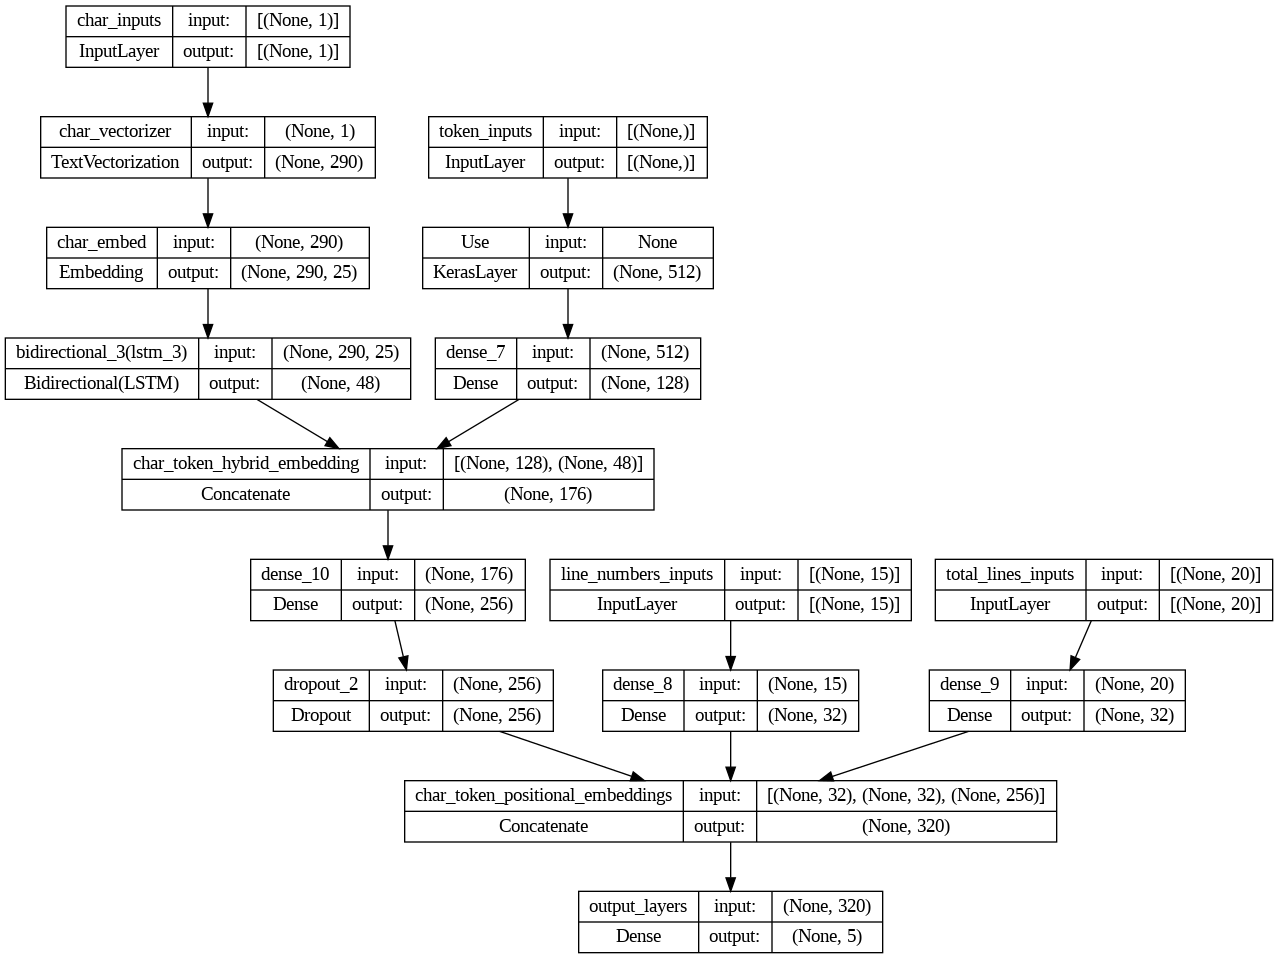

In [106]:
# USE - hemvectorizer hemde embedding edir
plot_model(model_5, show_shapes = True)

In [107]:
model_5.summary()

Model: "model_5_tribrid_embedding_layer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 Use (KerasLayer)            (None, 512)                  2567978   

In [108]:
model_5.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [111]:
#Create training and validation dataset(with all four kins of input data)
train_char_token_pos_data= tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                               train_total_lines_one_hot,
                                                               train_sentences,
                                                               train_chars))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset = tf.data.Dataset.zip((train_char_token_pos_data, train_char_token_pos_labels))
train_char_token_pos_dataset = train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

#Do the same as above but for the validation dataset
val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset = tf.data.Dataset.zip((val_char_token_pos_data, val_char_token_pos_labels))
val_char_token_pos_dataset = val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_char_token_pos_labels  =tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_dataset = tf.data.Dataset.zip((test_char_token_pos_data, test_char_token_pos_labels))
test_char_token_pos_dataset = test_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [112]:
history_model_5 = model_5.fit(train_char_token_pos_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_token_pos_dataset)),
                              epochs=3,
                              validation_data = val_char_token_pos_dataset,
                              validation_steps = int(0.1 * len(val_char_token_pos_dataset)))

Epoch 1/3
562/562 [==============================] - 30s 44ms/step - loss: 0.7614 - accuracy: 0.7119 - val_loss: 0.5466 - val_accuracy: 0.7972
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.4987 - accuracy: 0.8124 - val_loss: 0.4638 - val_accuracy: 0.8288
Epoch 3/3
562/562 [==============================] - 17s 31ms/step - loss: 0.4630 - accuracy: 0.8201 - val_loss: 0.4470 - val_accuracy: 0.8295


In [113]:
# import tensorflow_hub as hub

# sentence_encoder_layer = hub.KerasLayer(
#     'https://tfhub.dev/google/universal-sentence-encoder/4',
#     trainable=True, name='Use'
# )

In [114]:
# total_train_steps = len(train_char_token_pos_dataset)
# total_val_steps = len(val_char_token_pos_dataset)

In [115]:
# history_model_5 = model_5.fit(
#     train_char_token_pos_dataset,
#     steps_per_epoch = total_train_steps,
#     epochs=3,
#     validation_data = val_char_token_pos_dataset,
#     validation_steps=total_val_steps
# )

Epoch 1/3
5627/5627 [==============================] - 181s 32ms/step - loss: 0.4041 - accuracy: 0.8468 - val_loss: 0.3675 - val_accuracy: 0.8574
Epoch 2/3
5627/5627 [==============================] - 221s 39ms/step - loss: 0.3594 - accuracy: 0.8644 - val_loss: 0.3571 - val_accuracy: 0.8628
Epoch 3/3
5627/5627 [==============================] - 249s 44ms/step - loss: 0.3364 - accuracy: 0.8741 - val_loss: 0.3508 - val_accuracy: 0.8664


In [117]:
# history_model_5 = model_5.fit(train_char_token_pos_dataset,
#                               steps_per_epoch = len(train_char_token_pos_dataset),
#                               epochs=3,
#                               validation_data = val_char_token_pos_dataset,
#                               validation_steps = len(val_char_token_pos_dataset))

Epoch 1/3
  57/5627 [..............................] - ETA: 3:18 - loss: 0.2927 - accuracy: 0.8958

KeyboardInterrupt: 

In [118]:
model_5_pred_probs = model_5.predict(val_char_token_pos_dataset)
model_5_preds = tf.argmax(model_5_pred_probs, axis = 1)
model_5_preds

945/945 [==============================] - 56s 25ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [119]:
model_5_results = calculate_results(y_true = val_labels_encoded,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 87.09453197405004,
 'precision': 0.8705699586727468,
 'recall': 0.8709453197405005,
 'f1': 0.8695023724334208}

In [120]:
all_model_results = pd.DataFrame({'model_0_baseline': baseline_results,
                                  'model_1_custom_token_embedding': model_1_results,
                                  'model_2_pretrained_token_embedding': model_2_results,
                                  'model_3_custom_char_embedding': model_3_results,
                                  'model_4_hybrid_char_token_embedding': model_4_results,
                                  'model_5_pos_char_token_embedding': model_5_results})
all_model_results = all_model_results.transpose()   #setir sutun yerini deyisir(transpose)
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_custom_token_embedding,78.670727,0.783903,0.786707,0.784394
model_2_pretrained_token_embedding,71.223355,0.712640,0.712234,0.709166
model_3_custom_char_embedding,66.102873,0.661238,0.661029,0.658755
model_4_hybrid_char_token_embedding,74.556468,0.743128,0.745565,0.740685
model_5_pos_char_token_embedding,87.094532,0.870570,0.870945,0.869502


In [121]:
# Reduce the accuracy to same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100

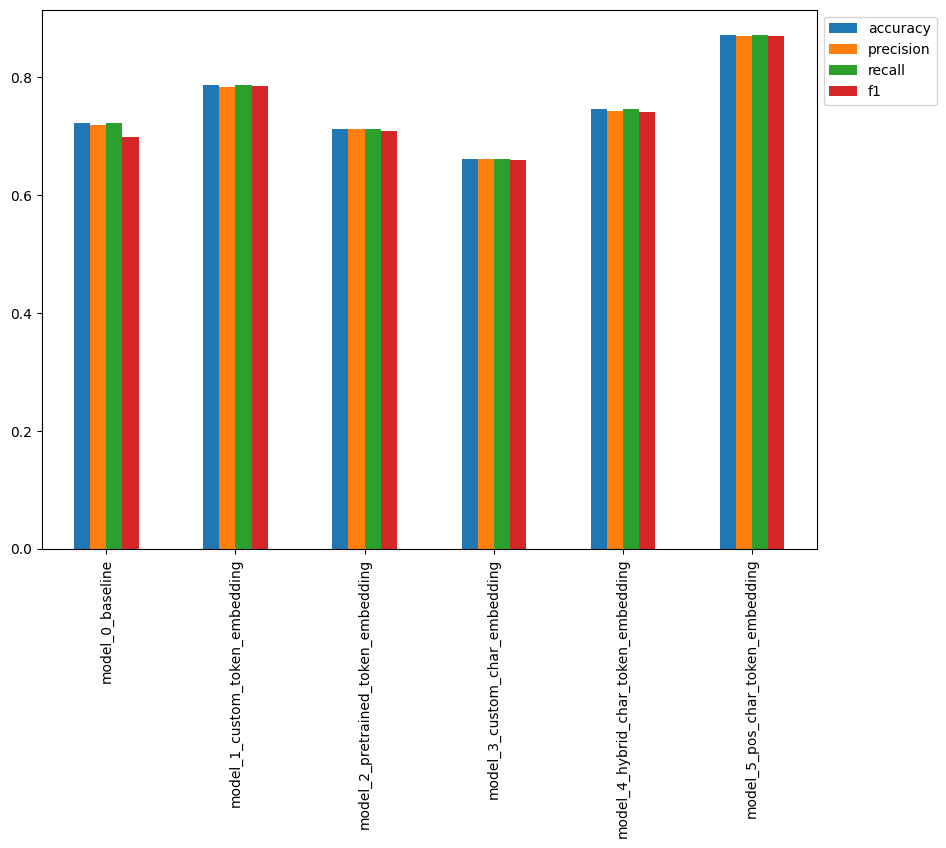

In [122]:
all_model_results.plot(kind = 'bar', figsize = (10, 7)).legend(bbox_to_anchor = (1.0, 1.0))

<Axes: >

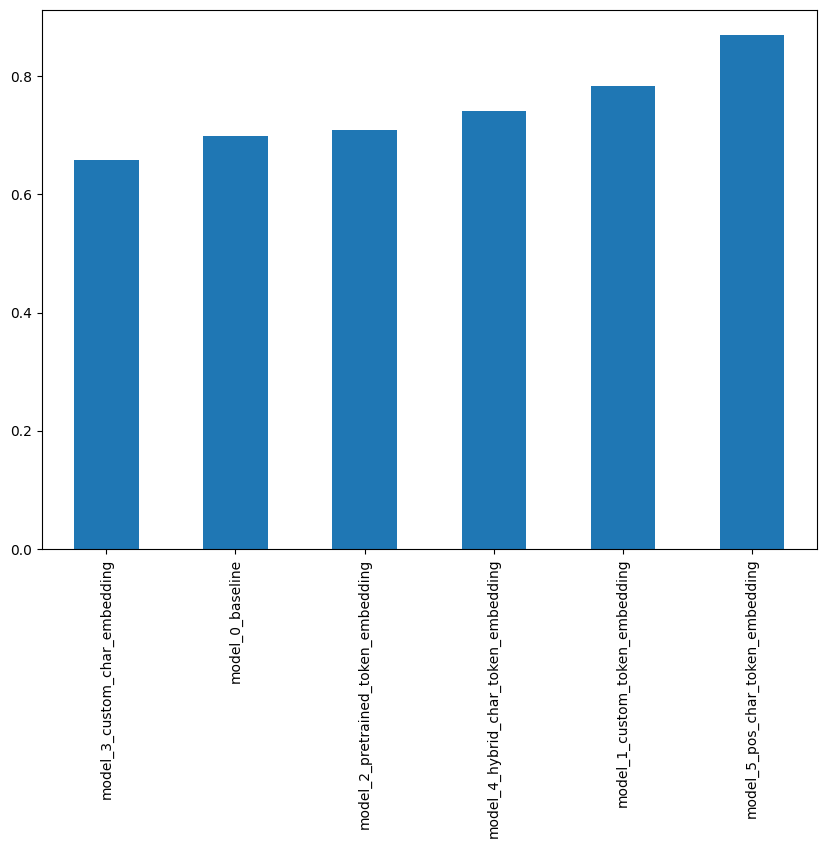

In [123]:
all_model_results.sort_values('f1', ascending = True)['f1'].plot(kind = 'bar', figsize = (10, 7))
# balacadan boyuye-ascending

In [124]:
model_5.save('skimlit_tribrid_model')

In [125]:
loaded_model = tf.keras.models.load_model('/content/skimlit_tribrid_model')

In [126]:
loaded_model.evaluate(val_char_token_pos_dataset)

945/945 [==============================] - 28s 28ms/step - loss: 0.3457 - accuracy: 0.8709


[0.34571200609207153, 0.8709453344345093]

In [127]:
loaded_model.summary()

Model: "model_5_tribrid_embedding_layer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 Use (KerasLayer)            (None, 512)                  2567978   